In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def multiple_formatter(denominator=2, number=np.pi, latex="\pi"):
    def gcd(a, b):
        while b:
            a, b = b, a % b
        return a

    def _multiple_formatter(x, pos):
        den = denominator
        num = np.rint(den * x / number)
        com = gcd(num, den)
        (num, den) = (int(num / com), int(den / com))
        if den == 1:
            if num == 0:
                return r"$0$"
            if num == 1:
                return r"$%s$" % latex
            elif num == -1:
                return r"$-%s$" % latex
            else:
                return r"$%s%s$" % (num, latex)
        else:
            if num == 1:
                return r"$\frac{%s}{%s}$" % (latex, den)
            elif num == -1:
                return r"$\frac{-%s}{%s}$" % (latex, den)
            else:
                return r"$\frac{%s%s}{%s}$" % (num, latex, den)

    return _multiple_formatter


class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex="\pi"):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(
            multiple_formatter(self.denominator, self.number, self.latex)
        )


def fancy_axes(ax):
    # Show the minor grid as well. Style it in very light gray as a thin,
    # dotted line.
    ax.grid(which="major", color="#DDDDDD", linewidth=0.8)
    ax.grid(which="minor", color="#EEEEEE", linestyle=":", linewidth=0.5)
    ax.minorticks_on()
    ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
    return ax

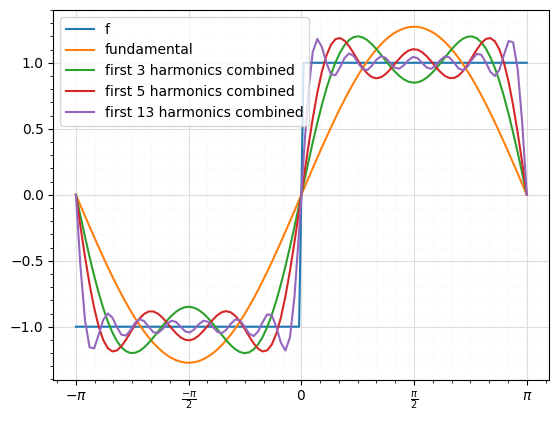

In [3]:
def square_wave_harmonic(n, wt):
    return (4 / (n * np.pi)) * np.sin(n * wt)


x = np.linspace(-np.pi, np.pi, 100)

f = list(map(lambda t: -1 if t < 0 else 1, x))
f1 = square_wave_harmonic(1, x)


def multiple_harmonics(list_of_ns):
    sum = np.zeros(len(x))
    for n in list_of_ns:
        sum += np.array(square_wave_harmonic(n, x))
    return sum


first_three = multiple_harmonics(range(1, 4, 2))
first_five = multiple_harmonics(range(1, 6, 2))
first_13 = multiple_harmonics(range(1, 14, 2))

fig, ax = plt.subplots()
ax.plot(x, f, label="f")
ax.plot(x, f1, label="fundamental")
ax.plot(x, first_three, label="first 3 harmonics combined")
ax.plot(x, first_five, label="first 5 harmonics combined")
ax.plot(x, first_13, label="first 13 harmonics combined")
fancy_axes(ax)

ax.legend()

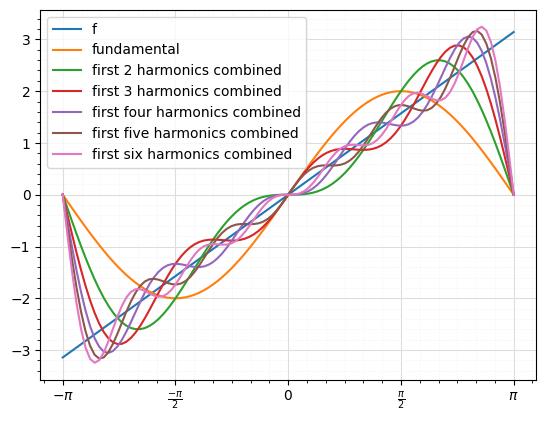

In [4]:
def linear_harmonic(n, wt):
    return -(2 / n) * np.sign(np.cos(n * np.pi)) * np.sin(n * wt)


x = np.linspace(-np.pi, np.pi, 100)

linearf = list(map(lambda t: t, x))
linear_f1 = linear_harmonic(1, x)


def multiple_linear_harmonics(list_of_ns):
    sum = np.zeros(len(x))
    for n in list_of_ns:
        sum += np.array(linear_harmonic(n, x))
    return sum


first_two = multiple_linear_harmonics(range(1, 3))
first_three = multiple_linear_harmonics(range(1, 4))
first_four = multiple_linear_harmonics(range(1, 5))
first_five = multiple_linear_harmonics(range(1, 6))
first_six = multiple_linear_harmonics(range(1, 7))

fig2, ax2 = plt.subplots()
ax2.plot(x, linearf, label="f")
ax2.plot(x, linear_f1, label="fundamental")
ax2.plot(x, first_two, label="first 2 harmonics combined")
ax2.plot(x, first_three, label="first 3 harmonics combined")
ax2.plot(x, first_four, label="first four harmonics combined")
ax2.plot(x, first_five, label="first five harmonics combined")
ax2.plot(x, first_six, label="first six harmonics combined")
fancy_axes(ax2)

ax2.legend()

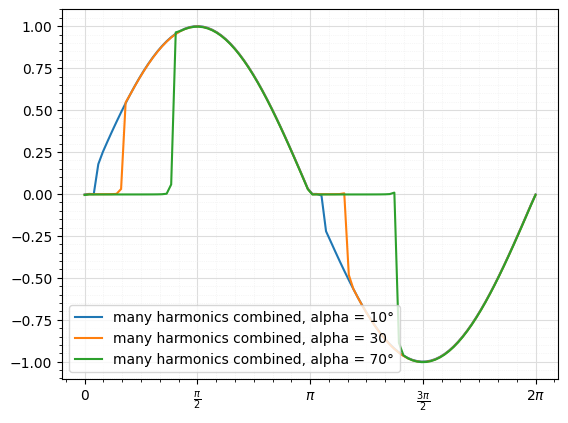

In [8]:
x = np.linspace(0, 2 * np.pi, 100)


# parameter a is firing angle alpha
def b_n(a, n):
    if n == 1:
        return 1 - (a - np.sin(a) * np.cos(a)) / np.pi
    return (2 / (np.pi * ((n**2) - 1))) * (
        n * np.sin(a) * np.cos(n * a) - np.sin(n * a) * np.cos(a)
    )


# parameter a is firing angle alpha
def a_n(a, n):
    if n == 1:
        return (-1 / np.pi) * (1 - np.cos(a) ** 2)

    return (2 / (np.pi * ((n**2) - 1))) * (
        1 - np.cos(a) * np.cos(n * a) - n * np.sin(a) * np.sin(n * a)
    )


# a is firing angle alpha
def firing_angle_harmonic(a, n, wt):
    # return a_n(a, n) * np.cos(n * wt)  # + b_n(a, n) * np.sin(n * wt)
    return a_n(a, n) * np.cos(n * wt) + b_n(a, n) * np.sin(n * wt)


def multiple_firing_angle_harmonics(list_of_ns, a):
    sum = np.zeros(len(x))
    for n in list_of_ns:
        sum += np.array(firing_angle_harmonic(a, n, x))
    return sum


beta = 10 * np.pi / 180
first_70_10 = multiple_firing_angle_harmonics(range(1, 100, 2), beta)
beta = 30 * np.pi / 180
first_70_30 = multiple_firing_angle_harmonics(range(1, 100, 2), beta)
beta = 70 * np.pi / 180
first_70_70 = multiple_firing_angle_harmonics(range(1, 100, 2), beta)
fig3, ax3 = plt.subplots()
fancy_axes(ax3)
ax3.plot(x, first_70_10, label=f"many harmonics combined, alpha = 10°")
ax3.plot(x, first_70_30, label=f"many harmonics combined, alpha = 30")
ax3.plot(x, first_70_70, label=f"many harmonics combined, alpha = 70°")
ax3.legend()

In [26]:
def calc_rms(a, n):
    i = firing_angle_harmonic(a, n, x)
    return (
        (1 / (2 * np.pi))
        * np.trapz(
            i**2,
            x,
        )
    ) ** 0.5


alphas_in_degrees = [10, 30, 70]
alphas = np.array(alphas_in_degrees) * np.pi / 180.0
rms_fun = [calc_rms(angle, 1) for angle in alphas]


def p_avg(a):
    return 1 - ((a - np.sin(a) * np.cos(a)) / np.pi)


power_levels = map(lambda a: p_avg(a), alphas)

harmonic_factor_3 = 100 * np.array([calc_rms(angle, 3) for angle in alphas]) / rms_fun
harmonic_factor_5 = 100 * np.array([calc_rms(angle, 5) for angle in alphas]) / rms_fun
harmonic_factor_7 = 100 * np.array([calc_rms(angle, 7) for angle in alphas]) / rms_fun
harmonic_factor_9 = 100 * np.array([calc_rms(angle, 9) for angle in alphas]) / rms_fun
harmonic_factor_11 = 100 * np.array([calc_rms(angle, 11) for angle in alphas]) / rms_fun
harmonic_factor_13 = 100 * np.array([calc_rms(angle, 13) for angle in alphas]) / rms_fun

df = pd.DataFrame(
    {
        "Firing Angle": [f"{a}°" for a in alphas_in_degrees],
        "Power Level": power_levels,
        "Fundamental": [100, 100, 100],
        "3rd": harmonic_factor_3,
        "5th": harmonic_factor_5,
        "7th": harmonic_factor_7,
        "9th": harmonic_factor_9,
        "11th": harmonic_factor_11,
        "13th": harmonic_factor_13,
    }
)

df

,Firing Angle,Power Level,Fundamental,3rd,5th,7th,9th,11th,13th
0,10°,0.998879,100,0.960855,0.947890,0.928707,0.903616,0.873025,0.837431
1,30°,0.971166,100,8.166647,7.202305,5.932931,4.546996,3.266659,2.333328
2,70°,0.713414,100,36.656160,17.000373,10.195821,9.821171,6.624856,6.157882


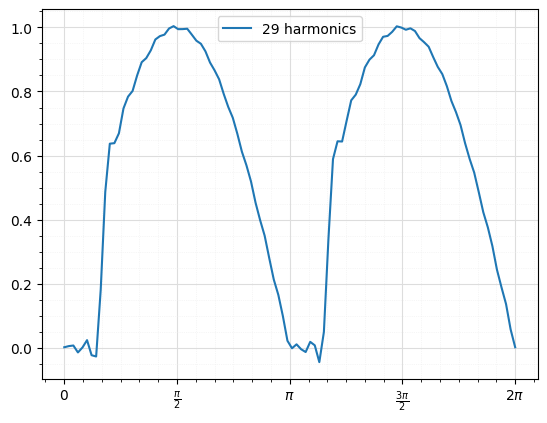

In [28]:
cos = np.cos
sin = np.sin
pi = np.pi

x = np.linspace(0, 2 * pi, 100)


def an_4(a, n):
    if n == 1:
        return 0
    return (1 / (pi * (n**2 - 1))) * (
        -cos(n * pi)
        - cos(a) * cos(n * a)
        - n * sin(a) * sin(n * a)
        - cos(2 * n * pi)
        + cos(a + pi) * cos(n * (a + pi))
        + n * sin(a + pi) * sin(n * (a + pi))
    )


def a0_4(a):
    return (2 + 2 * cos(a)) / pi


def bn_4(a, n):
    if n == 1:
        return 0
    return (1 / (pi * (n**2 - 1))) * (
        -sin(n * a) * cos(a)
        + n * sin(a) * cos(n * a)
        + sin(n * (pi + a)) * cos(pi + a)
        - n * sin(pi + a) * cos(n * (pi + a))
    )


def rectified_harmonic(a, n, x):
    return an_4(a, n) * cos(n * x) + bn_4(a, n) * sin(n * x)


def multiple_rectified_harmonics(list_of_ns, a):
    sum = np.ones(len(x)) * a0_4(a) / 2
    # sum = np.ones(len(x))
    for n in list_of_ns:
        sum += np.array(rectified_harmonic(a, n, x))
    return sum


output = multiple_rectified_harmonics(range(1, 29), pi / 6)

fig_rect, ax_rect = plt.subplots()
ax_rect.plot(x, output, label="29 harmonics")
fancy_axes(ax_rect)
ax_rect.legend()


<Axes: xlabel='firing angle', ylabel='power factor'>

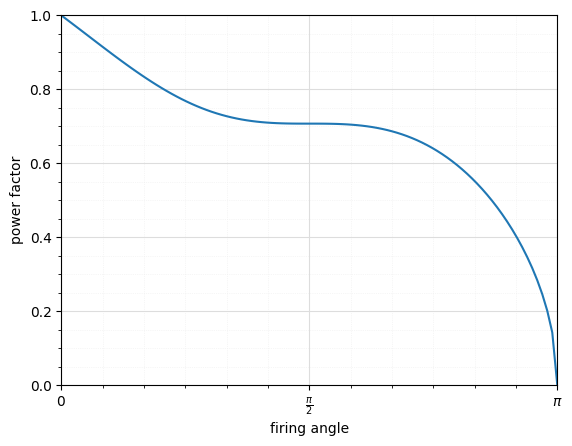

In [29]:
def pf(a):
    return (1 - (a + np.sin(a) * np.cos(a)) / np.pi) ** 0.5


x_pf = np.linspace(0, np.pi, 100)
fig_pf, ax_pf = plt.subplots()
ax_pf.plot(x_pf, pf(x_pf))
ax_pf.set_ylim(0, 1)
ax_pf.set_xlim(0, np.pi)
ax_pf.set_ylabel("power factor")
ax_pf.set_xlabel("firing angle")
fancy_axes(ax_pf)